In [69]:
import pandas as pd
import numpy as np
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.layers import  Flatten, LSTM, Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.preprocessing import LabelBinarizer

In [102]:
import nltk
import string 
from nltk.corpus import stopwords 
nltk.download('stopwords')
import re
from nltk.stem.snowball import SnowballStemmer 

[nltk_data] Downloading package stopwords to C:\Users\Mounika
[nltk_data]     kothuri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
data=pd.read_csv('G:/kaggle/project3/train.csv')

In [109]:
data=data.drop(columns=["Webpage_id","Domain"])

In [110]:
data.shape

(53447, 2)

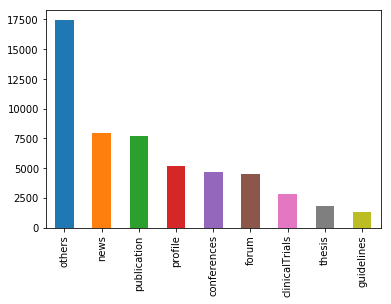

In [90]:
data["Tag"].value_counts().plot('bar')

In [91]:
data.head()

,Url,Tag
0,http://www.fiercepharma.com/marketing/tecfider...,news
1,http://www.fiercepharma.com/pharma/novo-equipp...,news
2,http://www.fiercepharma.com/pharma/another-exe...,news
3,http://www.fiercepharma.com/pharma/teva-buy-bi...,news
4,http://www.fiercepharma.com/marketing/actress-...,news


In [92]:
data['Tag'].value_counts()

others            17417
news               7992
publication        7705
profile            5196
conferences        4666
forum              4503
clinicalTrials     2839
thesis             1800
guidelines         1329
Name: Tag, dtype: int64

In [20]:
train_size = int(len(data) * .8)
 
train_posts = data['Url'][:train_size]
train_tags = data['Tag'][:train_size]
 
test_posts = data['Url'][train_size:]
test_tags = data['Tag'][train_size:]

In [51]:
num_labels = 9
vocab_size = 1500
batch_size = 100
max_feature=10000
maxlen=500

In [23]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_posts)

In [24]:
x_train = tokenizer.texts_to_matrix(train_posts, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test_posts, mode='tfidf')

In [28]:
encoder = LabelBinarizer()
encoder.fit(train_tags)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [29]:
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [30]:
model = Sequential()
model.add(Dense(512, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               768512    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 4617      
__________

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)

Train on 38481 samples, validate on 4276 samples
Epoch 1/30
38481/38481 [==============================] - 30s 769us/step - loss: 0.3064 - acc: 0.9063 - val_loss: 1.2413 - val_acc: 0.6462
Epoch 2/30
38481/38481 [==============================] - 26s 665us/step - loss: 0.1176 - acc: 0.9629 - val_loss: 1.1883 - val_acc: 0.7107
Epoch 3/30
38481/38481 [==============================] - 25s 659us/step - loss: 0.0870 - acc: 0.9728 - val_loss: 1.4354 - val_acc: 0.6876
Epoch 4/30
38481/38481 [==============================] - 26s 667us/step - loss: 0.0736 - acc: 0.9769 - val_loss: 2.0050 - val_acc: 0.6331
Epoch 5/30
38481/38481 [==============================] - 28s 726us/step - loss: 0.0621 - acc: 0.9812 - val_loss: 1.5770 - val_acc: 0.7212
Epoch 6/30
38481/38481 [==============================] - 26s 678us/step - loss: 0.0565 - acc: 0.9824 - val_loss: 2.0703 - val_acc: 0.7028
Epoch 7/30
38481/38481 [==============================] - 26s 671us/step - loss: 0.0521 - acc: 0.9835 - val_loss: 3.0

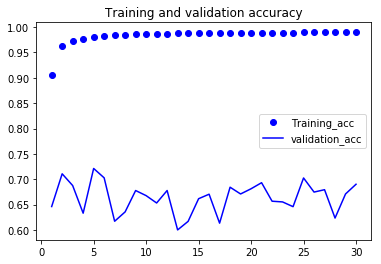

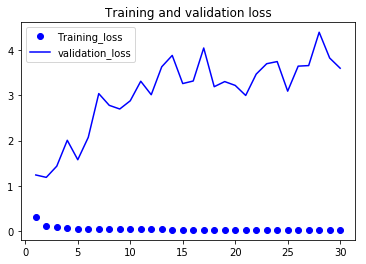

In [60]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training_acc')
plt.plot(epochs,val_acc,'b',label='validation_acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training_loss')
plt.plot(epochs,val_loss,'b',label='validation_loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()